## Observations and Insights 

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [162]:
# Checking the number of mice.
unique_mice_list = merged_df['Mouse ID'].unique()
num_unique_mice = len(unique_mice_list)
num_unique_mice

249

In [163]:
#creating a new df to clean
no_dups_df = merged_df.copy()

In [164]:
dup_index = []
dup_mice = []
def duplicate_checker_dups(mID):
    mask = merged_df['Mouse ID'] == mID
    only_mID = merged_df.loc[mask, :]
    dups = only_mID.duplicated(subset='Timepoint')
    end_index = len(dups)
    global dup_index
    dup_index = dups[dups == True].index[0: end_index]
    for n in dup_index:
        a_dup_mouse = merged_df.iloc[n, 0]
        if a_dup_mouse not in dup_mice:
            dup_mice.append(a_dup_mouse)
        global no_dups_df
        no_dups_df.drop(n, inplace=True)
for x in unique_mice_list:
    duplicate_checker_dups(x)
print(f'number of mice in the duplicates list: {len(dup_mice)}')
#since end_mice_list has only one value, there's only one mouse with duplicates, index=0
dup_mouse = dup_mice[0] 

number of mice in the duplicates list: 1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [165]:
#info on duplicate mouse
#info on that mouse
dup_mask_check = no_dups_df['Mouse ID'] == dup_mouse
dup_mouse_info = no_dups_df.loc[dup_mask_check, :]
dup_mouse_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [ ]:
#for if needing to drop the whole mouse - drop lines 14 and 15 in 4th code block
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#getting indices for the mouse with repeats
#index_dups = dup_info_df.index.values
#dropping the rows with the repeat mouse
#for i in index_dups:
    #no_dups_df.drop(i, inplace=True) 
#no_dups_df.head(20)

In [154]:
# Checking the number of mice in the clean DataFrame.
#checking length of new df mouse list
unique_mice_list_new = no_dups_df['Mouse ID'].unique()
num_unique_mice_new = len(unique_mice_list_new)

#old list
original_mice_list = merged_df['Mouse ID'].unique()
num_original_mice = len(original_mice_list)
num_unique_mice_new, num_original_mice

(249, 249)

## Summary Statistics

In [166]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
no_dups_df_grouped = no_dups_df.groupby('Drug Regimen')
avg_tumour_size = no_dups_df_grouped['Tumor Volume (mm3)'].mean() 
avg_tumour_size = avg_tumour_size.rename('mean_vol')
median_tumour_size = no_dups_df_grouped['Tumor Volume (mm3)'].median()
median_tumour_size = median_tumour_size.rename('median_vol')
var_tumour = no_dups_df_grouped['Tumor Volume (mm3)'].var(ddof=0)
var_tumour = var_tumour.rename('variance_vol')
std_tumour = no_dups_df_grouped['Tumor Volume (mm3)'].std(ddof=0)
std_tumour = std_tumour.rename('standardDev_vol')
#SEM is unbiased standard error of the mean
sem_tumour = no_dups_df_grouped['Tumor Volume (mm3)'].sem(ddof=0)
sem_tumour = sem_tumour.rename('SEM_vol')

summary_df = pd.concat([avg_tumour_size, median_tumour_size, var_tumour, std_tumour, sem_tumour], axis=1)
summary_df

,mean_vol,median_vol,variance_vol,standardDev_vol,SEM_vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.393463,50.909965,42.862273,6.546928,0.524174
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summstats = no_dups_df_grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summstats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

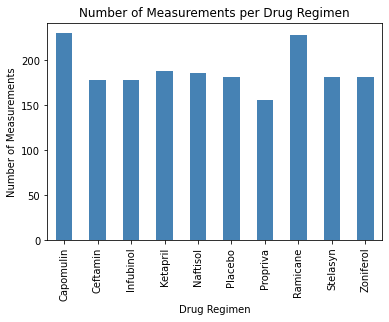

In [168]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
no_dups_df_grouped = no_dups_df.groupby('Drug Regimen')
num_measurements_df = pd.DataFrame(no_dups_df_grouped['Drug Regimen'].count()).rename(columns=({'Drug Regimen': 'Number of Measurements'}))

num_measurements_df.plot(kind='bar', title='Number of Measurements per Drug Regimen', color='steelblue', legend=None, ylabel='Number of Measurements')

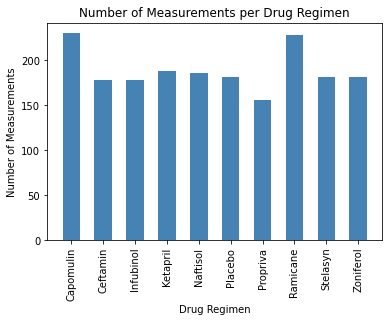

In [169]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = num_measurements_df.index
y_axis = num_measurements_df['Number of Measurements']

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.title('Number of Measurements per Drug Regimen')
plt.bar(x_axis, y_axis, width=0.55, color='steelblue')
plt.xticks(x_axis, rotation=90)
plt.show()

<AxesSubplot:title={'center':'Gender Distribution of Mice in Experiment'}>

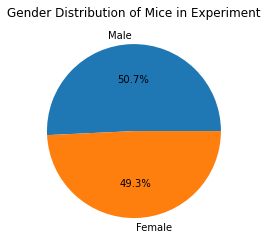

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = no_dups_df['Sex'].value_counts()
mice_sex.plot(kind='pie', title='Gender Distribution of Mice in Experiment', autopct='%1.1f%%', label='')

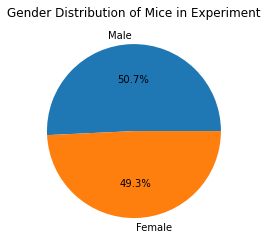

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = mice_sex
labels = mice_sex.index

plt.pie(mice_sex, labels=labels, autopct='%1.1f%%')
plt.title('Gender Distribution of Mice in Experiment')
plt.show()

## Quartiles, Outliers and Boxplots

In [172]:
no_dups_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


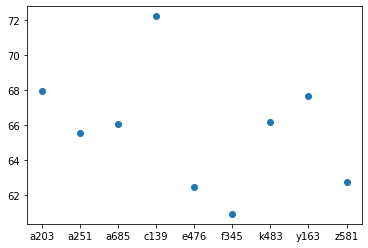

In [205]:
mask = (no_dups_df['Drug Regimen'] == 'Infubinol') & (no_dups_df['Timepoint'] == 45)
subset_df = no_dups_df.loc[mask, :]
sub_subset_df = subset_df[['Mouse ID','Tumor Volume (mm3)']]
sub_subset_df

x_vals = sub_subset_df.iloc[:, 0]
y_vals = sub_subset_df.iloc[:, 1]

plt.scatter(x_vals, y_vals)


In [188]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
ca_list = []
ra_list = []
in_list = []
ce_list = []

list_of_lists = [ca_list, ra_list, in_list, ce_list]

treatment_last_times = {}
tumour_vol = []
final_vols_dict = {}
def last_time (treatment):
    max_timepoint = -1
    tumour_values = []
    timepoints = []
    final_tumour_vol = 0
    for x in range(0, (len(no_dups_df)-1)):
        if (no_dups_df.iloc[x, 1] == treatment) & (no_dups_df.iloc[x, 5] > max_timepoint):
            max_timepoint = no_dups_df.iloc[x, 5]
    treatment_last_times[treatment] = max_timepoint
def last_values (treatment, max_time, list_name):
    mask = (no_dups_df['Drug Regimen'] == treatment) & (no_dups_df['Timepoint'] == max_time)
    only_med = no_dups_df.loc[mask, :]
    list_name.append(only_med.iloc[:, 6])
    
for name in treatments:
    last_time(name)
    max_time = treatment_last_times[name]
    thelist = list_of_lists[treatments.index(name)]
    last_values(name, max_time, thelist)

print(f'last timepoint: {treatment_last_times}')

ca_df = pd.DataFrame(ca_list).T.reset_index(drop=True).rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol(mm3) at T45'})
ra_df = pd.DataFrame(ra_list).T.reset_index(drop=True).rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol(mm3) at T45'})
in_df = pd.DataFrame(in_list).T.reset_index(drop=True).rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol(mm3) at T45'})
ce_df = pd.DataFrame(ce_list).T.reset_index(drop=True).rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol(mm3) at T45'})

ca_df, ra_df, in_df, ce_df

last timepoint: {'Capomulin': 45, 'Ramicane': 45, 'Infubinol': 45, 'Ceftamin': 45}


(    Tumor Vol(mm3) at T45
 0               23.343598
 1               28.484033
 2               28.430964
 3               31.023923
 4               31.896238
 5               32.377357
 6               33.329098
 7               34.455298
 8               37.311846
 9               36.041047
 10              37.074024
 11              38.846876
 12              38.939633
 13              38.982878
 14              38.125164
 15              40.658124
 16              40.159220
 17              40.728578
 18              41.483008
 19              41.581521
 20              47.685963,
     Tumor Vol(mm3) at T45
 0               22.050126
 1               29.128472
 2               30.276232
 3               30.564625
 4               30.638696
 5               31.560470
 6               31.095335
 7               33.397653
 8               32.978522
 9               33.562402
 10              36.134852
 11              38.810366
 12              37.225650
 13              36.374510


array([[<AxesSubplot:title={'center':'Tumor Vol(mm3) at T45'}>]],
      dtype=object)

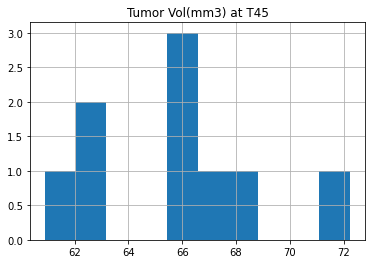

In [196]:
ca_df, ra_df, in_df, ce_df
in_df.hist()

In [192]:
df_list = [ca_df, ra_df, in_df, ce_df]

for x in range(0, len(treatments)):
    treatment_name = treatments[x]
    reg_df = df_list[x]
    #print(reg_df)
    quants = reg_df.quantile([0.25,0.5,0.75])
    q1 = quants.iloc[0, 0]
    print(quants)
    reg_mean = quants.iloc[1, 0]
    q3 = quants.iloc[2, 0]
    iqr = q3 - q1
    upperbound = q3 + (1.5 * iqr)
    lowerbound = q1 - (1.5 * iqr)
    print(f'{treatment_name}:')
    print(f'Q1: {q1}, Q3: {q3}')
    print(f'iqr: {iqr}')
    print(f'upper bound: {upperbound}, lower bound: {lowerbound}')
    mask = (reg_df ["Tumor Vol(mm3) at T45"] > upperbound) | (reg_df ["Tumor Vol(mm3) at T45"] < lowerbound)
    outliers = reg_df.loc[mask, :]  
    print(f'Potential outliers for {treatment_name} would be below {lowerbound} or above {upperbound}. There are {len(outliers)} potential outliers in the dataset.')
    

      Tumor Vol(mm3) at T45
0.25              32.377357
0.50              37.311846
0.75              40.159220
Capomulin:
Q1: 32.37735684, Q3: 40.1592203
iqr: 7.781863460000004
upper bound: 51.83201549, lower bound: 20.70456164999999
Potential outliers for Capomulin would be below 20.70456164999999 or above 51.83201549. There are 0 potential outliers in the dataset.
      Tumor Vol(mm3) at T45
0.25              30.981175
0.50              34.848627
0.75              38.508305
Ramicane:
Q1: 30.981175224999998, Q3: 38.508305307499995
iqr: 7.527130082499998
upper bound: 49.79900043124999, lower bound: 19.690480101250003
Potential outliers for Ramicane would be below 19.690480101250003 or above 49.79900043124999. There are 0 potential outliers in the dataset.
      Tumor Vol(mm3) at T45
0.25              62.754451
0.50              66.083066
0.75              67.685569
Infubinol:
Q1: 62.75445141, Q3: 67.68556862
iqr: 4.9311172099999965
upper bound: 75.08224443499999, lower bound: 55.35777

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'


ca_xaxis = ca_df.iloc[:, 0]
ra_xaxis = ra_df.iloc[:, 0]
in_xaxis = in_df.iloc[:, 0]
ce_xaxis = ce_df.iloc[:, 0]
regimens_dict = {'capomulin': ca_xaxis, 'ramicane': ra_xaxis, 'infubinol': in_xaxis, 'ceftamin': ce_xaxis}

fig, ax = plt.subplots()
ax.boxplot(regimens_dict.values())
ax.set_xticklabels(regimens_dict.keys(), rotation=45)
ax.set_title('Drug Regimen Final Tumor Size ')

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseID = 'i557'
capmousemask = (no_dups_df['Drug Regimen'] == 'Capomulin') & (no_dups_df['Mouse ID'] == mouseID)
only_cap_mouse = no_dups_df.loc[capmousemask, :]   

x_axis = only_cap_mouse.iloc[:, 5]
y_axis = only_cap_mouse.iloc[:, 6]


plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Vol (mm3)')
plt.title('Tumor Vol for Mouse {mouseID} on Capomulin Regimen over Time')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capmask = (no_dups_df['Drug Regimen'] == 'Capomulin')
only_cap = no_dups_df.loc[capmask, :]  
only_cap_grouped = only_cap.groupby('Weight (g)')
avg_tum_vol = only_cap_grouped['Tumor Volume (mm3)'].mean().reset_index(drop=False)

x_axis_weight = avg_tum_vol.iloc[:, 0]
y_axis_vol = avg_tum_vol.iloc[:, 1]

plt.scatter(x_axis_weight, y_axis_vol)
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Tumor Vol (mm3)')
plt.title('Average Tumor Size for Mouse Weight on Capomulin Regimen')
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_weight, y_axis_vol)
display_line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
lin_reg_mod = (slope * x_axis_weight) + intercept
print(display_line_eq)
print(f'correlation coefficient: {rvalue}')
plt.plot(x_axis_weight, lin_reg_mod, color='lime')
plt.annotate(display_line_eq, (18,38),fontsize=12,color="mediumseagreen")
plt.show()

## Correlation and Regression
(see above for linear regression)